In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import string,os
from string import punctuation     
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
# Read data
df = pd.read_csv('../data/clean_data/clean_data.csv')

In [3]:
## prerequisite
#python -m spacy download en_core_web_sm

# Data Preprocessing & Text Wrangling 

In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt
df['Content'] = np.vectorize(remove_pattern)(df['Content'], "#[\w]*")#remove hashtag

In [5]:
nlp = spacy.load('en_core_web_sm', vectors='en_google')
WNlemma = nltk.WordNetLemmatizer()
STOP_WORDS=stopwords.words("English")
stemmer = PorterStemmer()
custom_stopwords = [word for word in  open(os.path.join('util','custom_stopwords.txt'), "r").read().split() if word not in STOP_WORDS]
mystopwords = STOP_WORDS + custom_stopwords
def transform(text):
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    text = re.sub(r'''(?i)\b((?:http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"dead", " death ", text)    
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub("[^a-zA-Z,]"," ",str(text))
    text = text.split(',')[0].lower()
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    return text
def preprocess_nltk(text):
    tokens = nltk.word_tokenize(text)
#     tokens=[ WNlemma.lemmatize(t.lower()) for t in tokens]
    tokens_nop = [ t for t in tokens if t not in string.punctuation]
    tokens_lower=[t.lower() for t in tokens_nop]
    tokens_nostop=[ t for t in tokens_lower if t not in mystopwords]
#     tokens_stemmer=[stemmer.stem(w) for w in tokens_nostop]
    tokens_clean = [t for t in tokens_nostop if len(t) >=3]
    return(tokens_clean)
def preprocess_spacy(text, remove_stopwords=True, stem_words=False, punctuations=punctuation):
    # use spacy to do nlp process without parser and NER
    doc = nlp(text, disable=['parser', 'ner'])
#     tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-'] # reduce inflectional forms
    tokens = [tok for tok in doc if tok not in mystopwords and tok not in punctuations]
    tokens = [t for t in tokens if len(t) >=3]
    text = ' '.join(tokens)
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    text=" ".join(text.split())
    return(tokens)
# generate wordcloud
def gen_wc(text,process_flag,title_txt):
    if process_flag:tokens_clean = preprocess_nltk(text)
    #if process_flag:tokens_clean = preprocess_spacy(text)
    else : tokens_clean = text
    fd_clean = nltk.FreqDist(tokens_clean)
    wc2 = WordCloud(background_color="white")
    wc2.generate_from_frequencies(fd_clean)
    plt.imshow(wc2, interpolation="bilinear")
    plt.title(title_txt)
    plt.axis("off")
    plt.show()
def print_terms(cm, num):
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()
dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5',
        6: '6'}
cluster_labels = [ dict[c] for c in range(6)]

## Subsample into 3 groups
    1) WPSG 
         3 clusters
    2) PAPSG 
         3 clusters
    3) Overall_SingaporeGeneralElection 
        5 clusters

In [6]:
cluster_grp1 ,cluster_grp2 ,cluster_grp3 = 3,3,5
df['Tag'] = df['Tag'].apply(transform) 
keys = df.Tag.value_counts().keys()
mystopwords = mystopwords + keys.tolist()
print('Stopwords count - default : {}, custom : {}, total :{}'.format(len(STOP_WORDS),len(custom_stopwords),len(mystopwords)))
df['Content'] = df['Content'].apply(transform)
df.Tag.value_counts()

Stopwords count - default : 179, custom : 341, total :534


singaporevotes                     2270
general election sg                2250
ge                                  963
general election sg                 956
sgelections                         762
sgelection                          569
ge    sg                            211
singapore general election          179
wpsg                                129
gesg                                117
singapore general election          101
singapore ge                         93
sgge                                 89
papsingapore                         81
Name: Tag, dtype: int64

Dataset (129, 9)
Explained variance of the SVD step: 77%
Wall time: 2.99 ms
Silhouette Coefficient for clusters: 0.419
Cluster 0: opposition singh pritam khan raeesah jobs residents jamus gutter manifesto
Cluster 1: votes wins opposition stand heng pritam singh raeesah khan covid
Cluster 2: low thia khiang khan raeesah stand gutter covid jamus votes


d:\program files\python3.8\lib\site-packages\sklearn\feature_extraction\text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['general_election_sg', 'general_election_sg2020', 'gesg', 'japan', 'singapore_general_election_2020'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
<ipython-input-7-8e19e1da595e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df['class']= cluster_labels
d:\program files\python3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

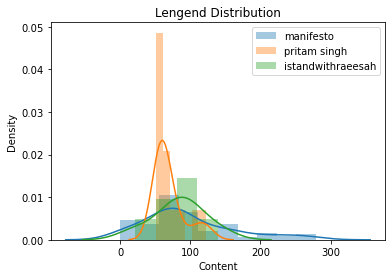

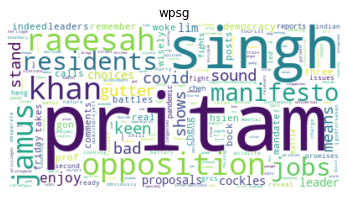

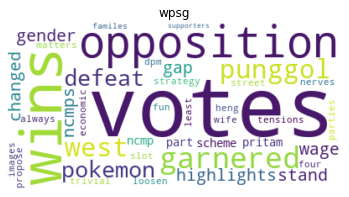

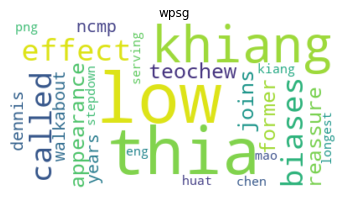

In [7]:
sel_df = df[(df['Tag']=='wpsg')]
print("Dataset {}".format(sel_df.shape))
num_cluster = cluster_grp1
text=sel_df['Content']
toks = text.apply(preprocess_nltk)
vectorizer = TfidfVectorizer(max_df=0.4, max_features=1500,
                             min_df=3, stop_words=mystopwords,use_idf=True)        
X_=[" ".join(token) for token in toks]
X=vectorizer.fit_transform(X_)  
svd = TruncatedSVD(algorithm='randomized', n_components=10, n_iter=100,
        random_state=42, tol=0.0)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))
km = KMeans(n_clusters=num_cluster, init='k-means++', max_iter=1000, n_init=1,random_state=4321)
%time km.fit(X_lsa)
labels = df['Tag']
print("Silhouette Coefficient for clusters: %0.3f"% metrics.silhouette_score(X_lsa, km.labels_))

print_terms(km, num_cluster)
cluster_labels = [ dict[c] for c in km.labels_]
sel_df['class']= cluster_labels

s1 = sel_df[sel_df['class'] == '0']['Content']
sns.distplot(s1.str.len(), label='manifesto')
s2 = sel_df[sel_df['class'] == '1']['Content']
sns.distplot(s2.str.len(), label='pritam singh')
s3 = sel_df[sel_df['class'] == '2']['Content']
sns.distplot(s3.str.len(), label='istandwithraeesah')

plt.title('Lengend Distribution')
plt.legend()
for i in range(1,num_cluster+1):
    plt.figure()
    gen_wc(' '.join(eval('s%d'%(i))),True,'wpsg')

Dataset (81, 9)
Explained variance of the SVD step: 89%
Wall time: 1.98 ms
Silhouette Coefficient for clusters: 0.397
Cluster 0: wins popularity voice peoples pasir seats covid slate west kang
Cluster 1: west covid bukit wins hsien fight kang chu pasir manifesto
Cluster 2: opposition covid slate west manifesto pasir seats bukit kang chu


d:\program files\python3.8\lib\site-packages\sklearn\feature_extraction\text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['general_election_sg', 'general_election_sg2020', 'gesg', 'japan', 'singapore_general_election_2020'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
<ipython-input-8-fbf12e552b5d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df['class']= cluster_labels
d:\program files\python3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

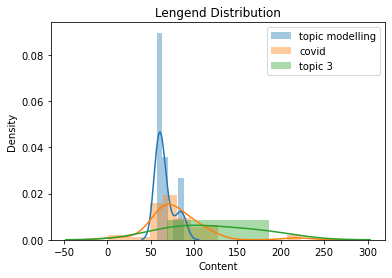

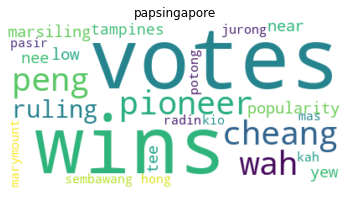

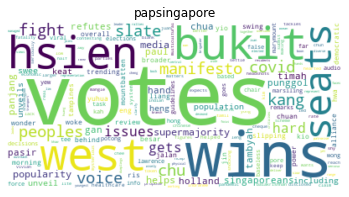

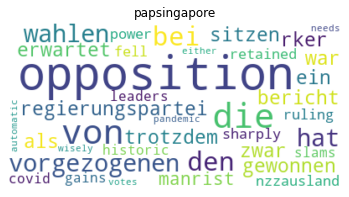

In [8]:
sel_df = df[(df['Tag']=='papsingapore')]
print("Dataset {}".format(sel_df.shape))

num_cluster = cluster_grp2
text=sel_df['Content']
toks = text.apply(preprocess_nltk)
vectorizer = TfidfVectorizer(max_df=0.4, max_features=1000,
                             min_df=3, stop_words=mystopwords,use_idf=True)        
X_=[" ".join(token) for token in toks]
X=vectorizer.fit_transform(X_)  
svd = TruncatedSVD(algorithm='randomized', n_components=10, n_iter=100,
        random_state=42, tol=0.0)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)
lsa

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))
km = KMeans(n_clusters=num_cluster, init='k-means++', max_iter=1000, n_init=1,random_state=4321)
%time km.fit(X_lsa)
labels = df['Tag']
print("Silhouette Coefficient for clusters: %0.3f"
      % metrics.silhouette_score(X_lsa, km.labels_))

print_terms(km, num_cluster)
cluster_labels = [ dict[c] for c in km.labels_]
sel_df['class']= cluster_labels
#result.append(sel_df)

s1 = sel_df[sel_df['class'] == '0']['Content']
sns.distplot(s1.str.len(), label='topic modelling')
s2 = sel_df[sel_df['class'] == '1']['Content']
sns.distplot(s2.str.len(), label='covid')
s3 = sel_df[sel_df['class'] == '2']['Content']
sns.distplot(s3.str.len(), label='topic 3')

plt.title('Lengend Distribution')
plt.legend()
for i in range(1,num_cluster+1):
    plt.figure()
    gen_wc(' '.join(eval('s%d'%(i))),True,'papsingapore')

Dataset (8560, 9)


d:\program files\python3.8\lib\site-packages\sklearn\feature_extraction\text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['general_election_sg', 'general_election_sg2020', 'gesg', 'japan', 'singapore_general_election_2020'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Explained variance of the SVD step: 6%
Wall time: 11 ms
Silhouette Coefficient for clusters: 0.519
Cluster 0: polls singaporeans open holds hotly contested stations goes opposition votes
Cluster 1: votes elections opposition seats parties wins stcom real singaporeans updates
Cluster 2: opposition seats singaporeans hsien parties votes elections power pandemic mandate
Cluster 3: upcoming reasons thoughts opposition seats cnbc pandemic hsien parties elections
Cluster 4: ruling wins majority seats polls opposition power hsien friday media


<ipython-input-9-0f2fbc6d6c9b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df['class']= cluster_labels
d:\program files\python3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\program files\python3.8\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

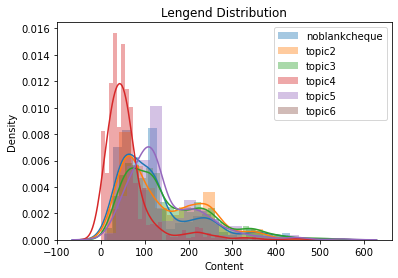

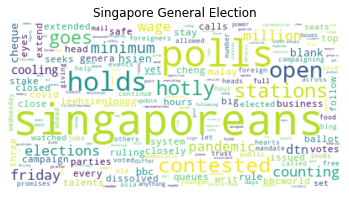

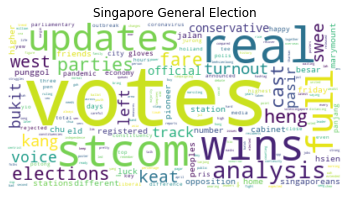

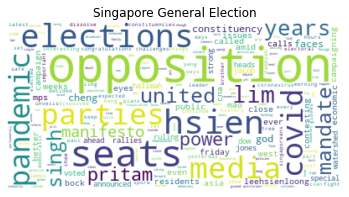

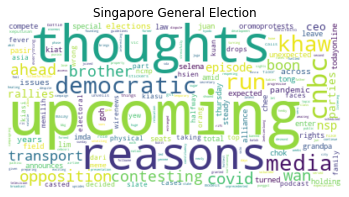

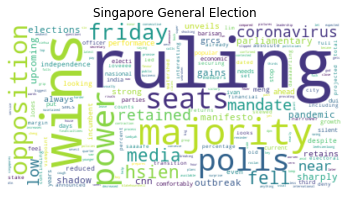

In [9]:
#for idx in range(len(keys)):
#    print(keys[idx])
num_cluster = cluster_grp3
sel_df = df[(df['Tag']!='wpsg') & (df['Tag']!='papsingapore')]
print("Dataset {}".format(sel_df.shape))
text=sel_df['Content']
toks = text.apply(preprocess_nltk)
vectorizer = TfidfVectorizer(max_df=0.4, max_features=2000,
                             min_df=3, stop_words=mystopwords,use_idf=True)        
X_=[" ".join(token) for token in toks]
X=vectorizer.fit_transform(X_)  
svd = TruncatedSVD(algorithm='randomized', n_components=6, n_iter=100,
        random_state=42, tol=0.0)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)
lsa

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))
km = KMeans(n_clusters=num_cluster, init='k-means++', max_iter=1000, n_init=1,random_state=4321)
%time km.fit(X_lsa)
labels = df['Tag']
print("Silhouette Coefficient for clusters: %0.3f"
      % metrics.silhouette_score(X_lsa, km.labels_))

print_terms(km, num_cluster)
cluster_labels = [ dict[c] for c in km.labels_]
sel_df['class']= cluster_labels
#result.append(sel_df)

s1 = sel_df[sel_df['class'] == '0']['Content']
sns.distplot(s1.str.len(), label='noblankcheque')
s2 = sel_df[sel_df['class'] == '1']['Content']
sns.distplot(s2.str.len(), label='topic2')
s3 = sel_df[sel_df['class'] == '2']['Content']
sns.distplot(s3.str.len(), label='topic3')
s4 = sel_df[sel_df['class'] == '3']['Content']
sns.distplot(s4.str.len(), label='topic4')
s5 = sel_df[sel_df['class'] == '4']['Content']
sns.distplot(s5.str.len(), label='topic5')
s6 = sel_df[sel_df['class'] == '5']['Content']
sns.distplot(s6.str.len(), label='topic6')

plt.title('Lengend Distribution')
plt.legend()
for i in range(1,num_cluster+1):
    plt.figure()
    gen_wc(' '.join(eval('s%d'%(i))),True,'Singapore General Election')